In [13]:
import json

with open("conala/conala-aggregated-grades.json", "r") as f:
    grades = json.load(f)

snippet_type = [
    "baseline",
    "tranx-annot",
    "best-tranx",
    "best-tranx-rerank",
    "codex"
]

count = {
    "inconsistent": 0,
    "total": 0,
}

for item in grades:
    for index_1 in range(len(snippet_type)):
        for index_2 in range(index_1 + 1, len(snippet_type)):
            code_1 = item[snippet_type[index_1]]
            code_2 = item[snippet_type[index_2]]
            if code_1 == code_2:
                score_1 = item[f"grade-{snippet_type[index_1]}"]
                score_2 = item[f"grade-{snippet_type[index_2]}"]
                if score_1 != score_2:
                    count["inconsistent"] += 1
            count["total"] += 1
                
print(count)
print(count["inconsistent"] / count["total"])

{'inconsistent': 126, 'total': 4720}
0.026694915254237287


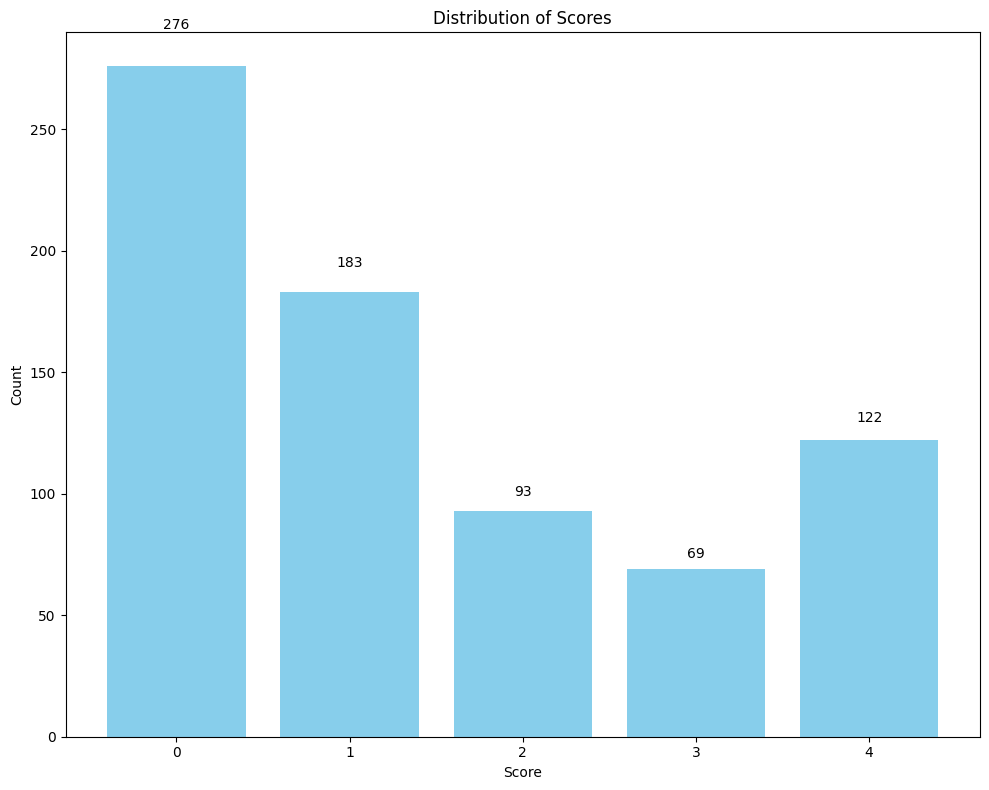

743
2360
0.3148305084745763


In [1]:
import json
import re
import matplotlib.pyplot as plt

with open("conala/conala-aggregated-grades.json", "r") as f:
    grades = json.load(f)

snippet_type = [
    "baseline",
    "tranx-annot",
    "best-tranx",
    "best-tranx-rerank",
    "codex"
]

def contains_single_backtick(text):
    """
    Check if the input string contains a single backtick (`) that is not
    part of a sequence of three backticks (```).

    Parameters:
    text (str): The string to check.

    Returns:
    bool: True if a single backtick is found, False otherwise.
    """
    # Pattern to match a single backtick, but not triple backticks
    pattern = r"(?<!`)`(?!`)"
    
    # Searching for the pattern in the text
    match = re.search(pattern, text)
    
    # If a match is found, return True, else False
    return bool(match)

# Example usage
numbers = ['0', '1', '2', '3', '4']
counts = [0, 0, 0, 0, 0]
total = 0


for item in grades:
    for index in range(len(snippet_type)):
        if contains_single_backtick(item[snippet_type[index]]):
            if item[f"grade-{snippet_type[index]}"] == 0:
                counts[0] += 1
            elif item[f"grade-{snippet_type[index]}"] == 1:
                counts[1] += 1
            elif item[f"grade-{snippet_type[index]}"] == 2:
                counts[2] += 1
            elif item[f"grade-{snippet_type[index]}"] == 3:
                counts[3] += 1
            elif item[f"grade-{snippet_type[index]}"] == 4:
                counts[4] += 1
        total += 1

plt.figure(figsize=(10, 8))  # Set the figure size for better readability
bars = plt.bar(numbers, counts, color='skyblue')

# Adding the numerical label above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05*yval, f'{yval}', ha='center', va='bottom')

plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.tight_layout()  # Adjust the layout to make room for the labels

plt.show()

print(sum(counts))
print(total)
print(sum(counts) / total)